In [1]:
import matplotlib.pyplot as plt
import numpy as np

from MembraneAnalysisToolbox.MembraneStructures import (
    HexagonalMembrane,
    Membrane,
    MembraneForDiffusionAnalysis,
)
from MembraneAnalysisToolbox.PoreAnalysis import PoreAnalysis

Results will not be saved because no results folder has been specified.
Allocating trajectories for selectors: "resname C".
	Progress: 100%
Trajectories allocated.
Lower boundary of the hexagonal structure: 233.23501586914062


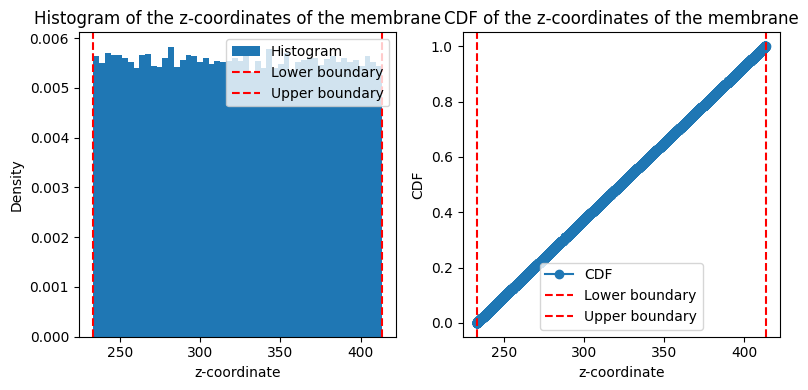

In [2]:
membrane = HexagonalMembrane(L=180, selectors="resname C")

PA = PoreAnalysis(
    topology_file="/bigpool/users/st166545/MembraneAnalysisToolbox/tests/data/hex_box_hex_dod/topol.tpr",
    trajectory_file="/bigpool/users/st166545/MembraneAnalysisToolbox/tests/data/hex_box_hex_dod/traj.xtc",
    membrane=membrane,
    analysis_max_step_size_ps=10000, # skip a lot of frames to make it faster for demonstration purposes
    verbose=True,
)

PA.find_membrane_location()
PA.print_membrane_location()
PA.verify_membrane_location()
#233.23501586914062

(251.23501586914062, 395.2350158691406)
Allocating trajectories for selectors: "resname DOD and name C3".
	Progress: 90%

	Progress: 100%
Trajectories allocated.
(4190, 201, 3)
(38675, 2)
Kde faktoren (mem, solv): 0.13


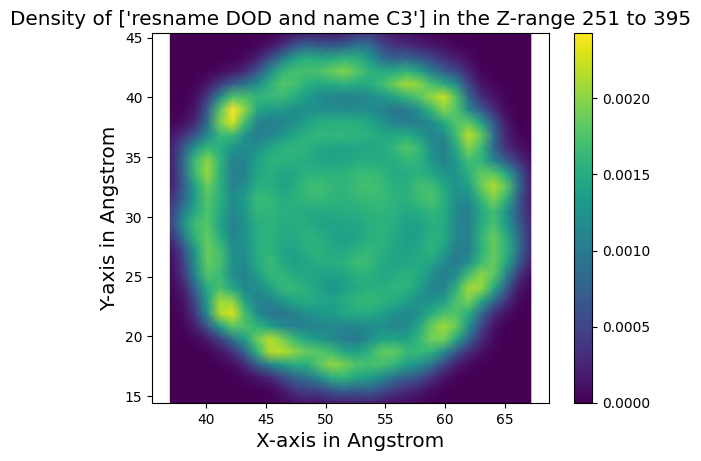

In [3]:
print(PA.membrane.find_zConstraints())
PA.analyseDensity(
    selectors=["resname DOD and name C3"],
    z_range=PA.membrane.find_zConstraints(),
    skip= 1,
    bw=0.13
    )

(251.23501586914062, 395.2350158691406)
Allocating trajectories for selectors: "resname DOD and name C1".
	Progress: 100%
Trajectories allocated.
(967, 2)
(63870, 2)
Kde faktor: 0.13
Kde faktor: 0.13


[0.0032057957916988983, 0.0004703676991673138]


array([[2.89295756e-01, 3.62540226e-01, 4.24777467e-01, ...,
        5.10680470e-32, 6.65157428e-34, 7.59310326e-36],
       [3.20540153e-01, 4.19695247e-01, 5.10208114e-01, ...,
        8.78090146e-31, 1.23890053e-32, 1.53200460e-34],
       [3.16553941e-01, 4.34648757e-01, 5.50425279e-01, ...,
        1.28892206e-29, 1.96870168e-31, 2.63556607e-33],
       ...,
       [1.61254838e-33, 1.19546255e-31, 7.76733632e-30, ...,
        2.84118648e-01, 2.24516662e-01, 1.62982252e-01],
       [9.27626668e-35, 7.46262293e-33, 5.26133541e-31, ...,
        2.65183149e-01, 2.19609808e-01, 1.68078351e-01],
       [4.68241248e-36, 4.08652648e-34, 3.12530517e-32, ...,
        2.20207208e-01, 1.90494046e-01, 1.53298763e-01]])

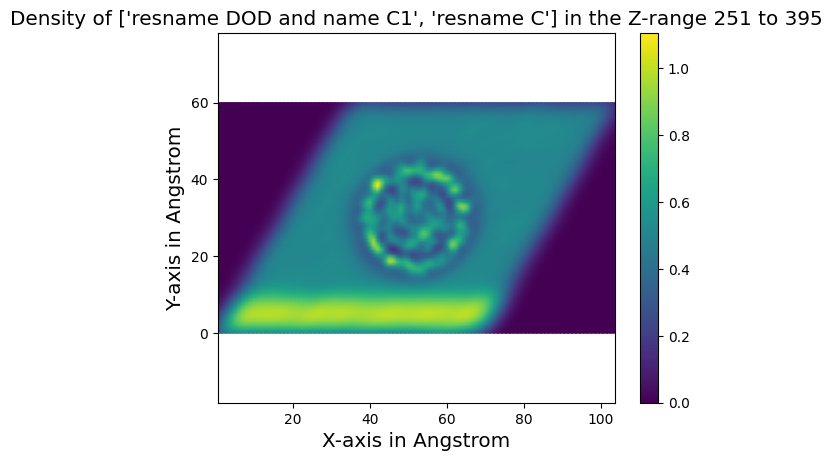

In [4]:
print(PA.membrane.find_zConstraints())
PA.analyseDensityNormed(
    selectors=["resname DOD and name C1", "resname C"],
    z_range=PA.membrane.find_zConstraints(),
    skip= 50,
    bw=0.13
    )

Allocating trajectories for selectors: "resname HEX and name C1".
	Progress: 24%

	Progress: 100%
Trajectories allocated.
(37.58155496354784, 66.52886299248097)
The effective pore size is: 28.94730802893313


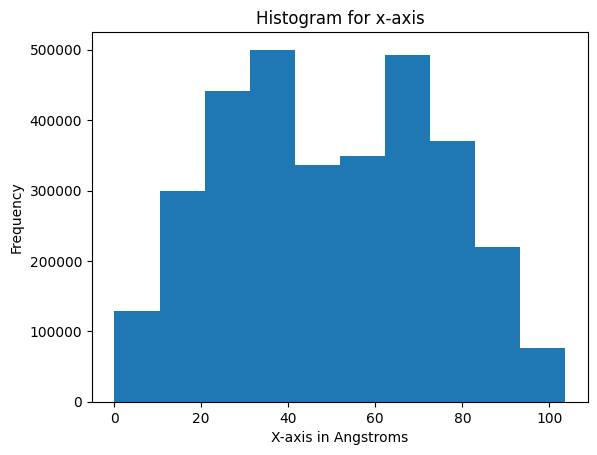

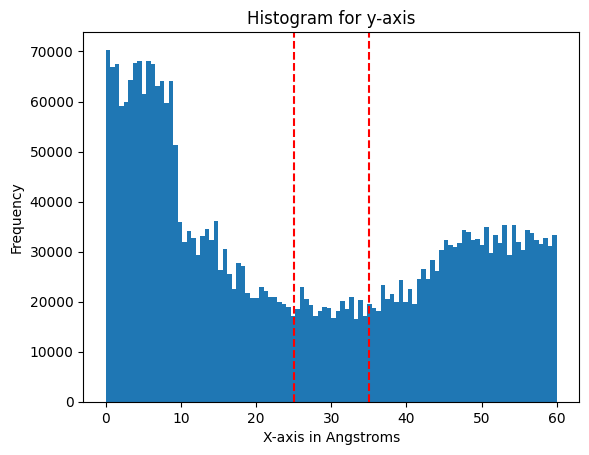

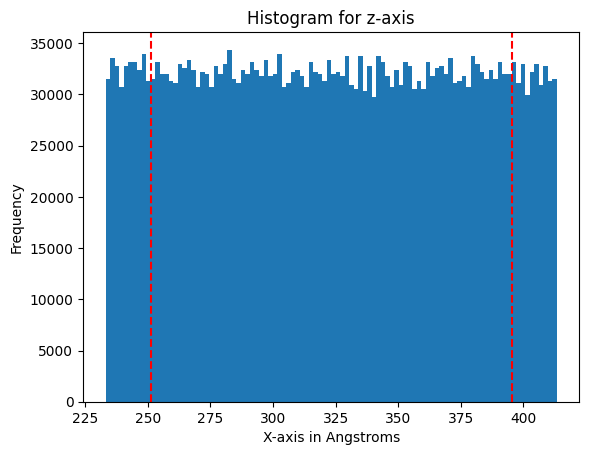

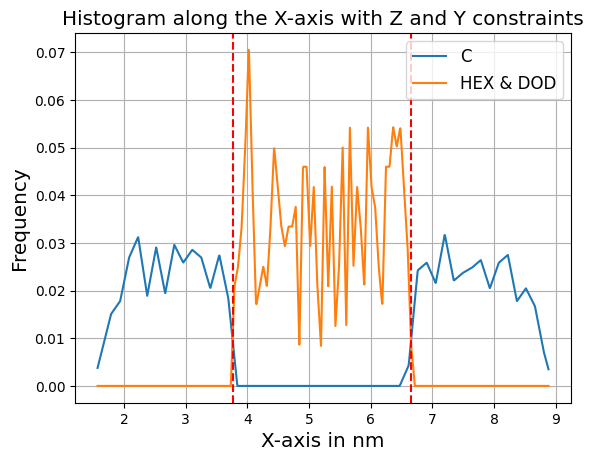

In [5]:
PA.analyseConstraints(
    "resname C",
    y_constraints=(25,35),
    z_constraints=PA.membrane.find_zConstraints(),
)
edges = PA.calculateEffectivePoreSize(
    solvent_selectors=["resname HEX and name C1"],
    z_constraints=PA.membrane.find_zConstraints(),
    y_constraints=(25,35),
    strategy="intersection",
    bins=50,
)
print(edges)
print(f"The effective pore size is: {edges[1] - edges[0]}")

lets minimize
[(0, 44), (0, 39)]
 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 92.74582969516439
       x: [ 2.049e+01  1.900e+01]
     nit: 1000
    nfev: 4046
    njev: 15
    nhev: 0
Optimal m_x: 19.00002146150308
Optimal m_y: 20.48809737683382


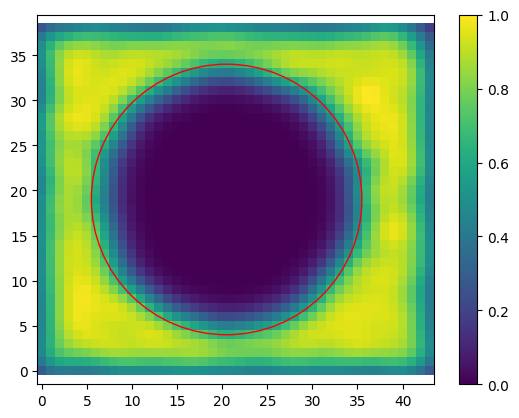

(49.00002146150308, 30.48809737683382)


In [6]:
porecenter = PA.findPoreCenter(
    z_constraints=PA.membrane.find_zConstraints(),
    skip= 100,
    bw = 0.13,
    x_threshold= (30,75),
    y_threshold= (10,50),
    radius = 15,
)
print(porecenter)
y_constraints = (porecenter[1]-porecenter[1]*0.1,porecenter[1]+porecenter[1]*0.1)

(37.43414540827387, 66.36641647781613)
The effective pore size is: 28.93227106954226


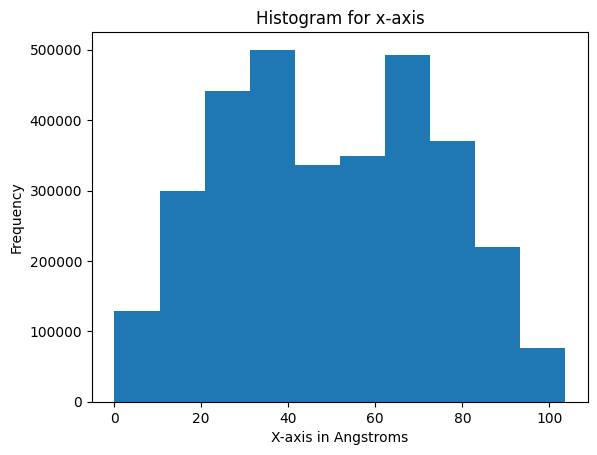

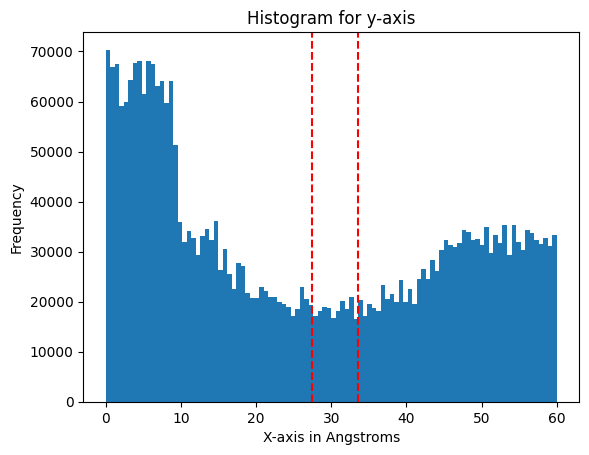

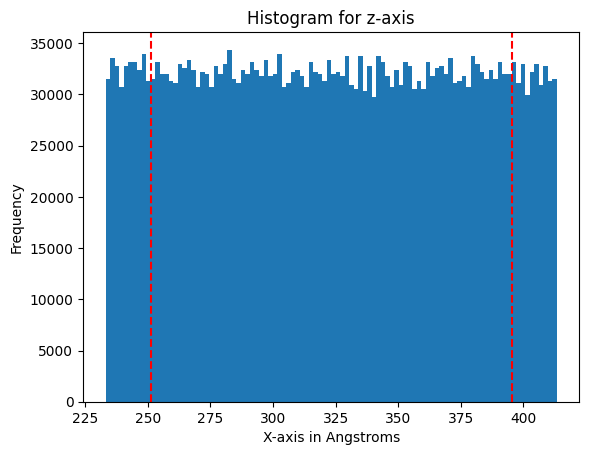

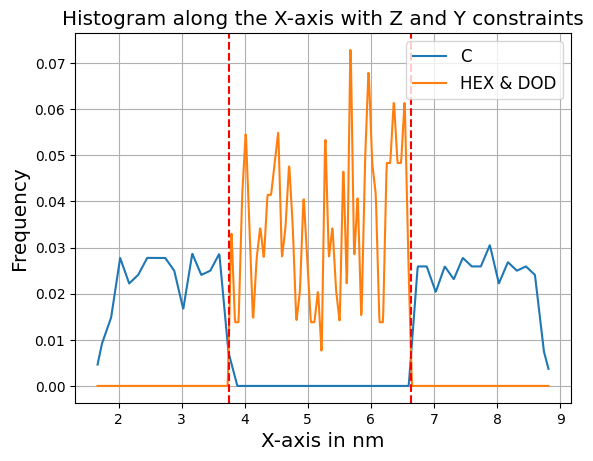

In [7]:
# jetzt das ganze mit den gefundenen y constraints
PA.analyseConstraints(
    "resname C",
    y_constraints=y_constraints,
    z_constraints=PA.membrane.find_zConstraints(),
)
edges = PA.calculateEffectivePoreSize(
    solvent_selectors=["resname HEX and name C1"],
    z_constraints=PA.membrane.find_zConstraints(),
    y_constraints=y_constraints,
    strategy="intersection",
    bins=50,
)
print(edges)
print(f"The effective pore size is: {edges[1] - edges[0]}")